In [2]:
using Muon
using Baysor

In [3]:
const B = Baysor

# load results Baysor segmentation
@time df_spatial, gene_names = B.load_df("output_no_dapi/segmentation.csv");
#Zdapi_arr = Float16.(Images.load("../run_results/osm_fish/segmentation.tiff"));

 15.083713 seconds (9.05 M allocations: 1.346 GiB, 5.96% gc time, 62.43% compilation time: 2% of which was recompilation)


In [4]:
size(df_spatial)

(4754923, 10)

In [76]:
# estimate cell polygons from segmentation results
#@time polygons = B.boundary_polygons(df_spatial, df_spatial.cell, grid_step=3.0, verbose=true, bandwidth=15.0,
#    min_molecules_per_cell=10, min_border_length=100);

# TODO: how to find all the polygons?
# IDEA: make more precise to find all polygons?
@time polygons = B.boundary_polygons(df_spatial, df_spatial.cell, grid_step=3.0, bandwidth=15.0, verbose=true);
length(polygons)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:27:33


 40.304296 seconds (65.37 M allocations: 11.261 GiB, 6.44% gc time, 0.04% compilation time)


14665

In [77]:
# create count matrix from segmentation results
# cell -> expression profile
cell_counts = B.convert_segmentation_to_counts(df_spatial.gene, df_spatial.cell; gene_names=gene_names)
genes = cell_counts[:, :gene]

cell_counts = permutedims(cell_counts, 1)
cell_counts = cell_counts[:, 2:end]

64248×98 DataFrame
   Row │ Acta2  Adamtsl2  Adgre1  Adgrg6  Atp6v0d2  Axl    C5ar1  Ccr2   Ccr7  ⋯
       │ Int64  Int64     Int64   Int64   Int64     Int64  Int64  Int64  Int64 ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     0         0       0       0         0      0      0      0      1 ⋯
     2 │     0         0       0       0         0      0      0      0      0
     3 │     0         0       0       0         0      0      0      0      0
     4 │     0         0       0       0         0      0      1      0      0
     5 │     0         0       0       0         0      0      0      0      0 ⋯
     6 │     0         0       0       0         0      0      0      0      0
     7 │     0         0       0       0         0      0      0      0      0
     8 │     0         0       0       0         0      1      0      0      0
     9 │     0         0       0       0         0      0      0      0      0 ⋯
    10 │     0         0       0       0         0      0      0      0      0
    11 │     0         0       0       0         0      0      0      0      0
   ⋮   │   ⋮       ⋮        ⋮       ⋮        ⋮        ⋮      ⋮      ⋮      ⋮   ⋱
 64239 │     0         0       0       0         0      0      0      0      0
 64240 │     0         0       0       0         0      0      0      0      0 ⋯
 64241 │     0         0       0       0         0      0      0      0      0
 64242 │     0         0       0       0         0      0      0      0      0
 64243 │     0         0       0       0         0      0      0      0      0
 64244 │     0         0       0       0         0      0      0      0      0 ⋯
 64245 │     0         0       0       0         0      0      0      0      0
 64246 │     0         0       0       0         0      0      0      0      0
 64247 │     0         0       1       0         0      0      0      0      0
 64248 │     0         0       0       0         0      0      0      0      0 ⋯
                                               89 columns and 64227 rows omitted

In [78]:
ad = AnnData(X=Matrix(cell_counts))

AnnData object 64248 ✕ 98

In [79]:
# assign genes to the var_names
ad.var_names = genes

98-element Vector{String}:
 "Acta2"
 "Adamtsl2"
 "Adgre1"
 "Adgrg6"
 "Atp6v0d2"
 "Axl"
 "C5ar1"
 "Ccr2"
 "Ccr7"
 "Cd14"
 "Cd19"
 "Cd207"
 "Cd209a"
 ⋮
 "Spp1"
 "Stab2"
 "Svep1"
 "Timd4"
 "Tmem119"
 "Trem2"
 "Vsig4"
 "Vwf"
 "Wnt2"
 "Wnt9b"
 "Wt1"
 "Xcr1"

In [80]:
polygons

14665-element Vector{Matrix{Float64}}:
 [7.0 1531.0; 7.0 1528.0; … ; 4.0 1531.0; 7.0 1531.0]
 [64.0 1582.0; 61.0 1582.0; … ; 67.0 1579.0; 64.0 1582.0]
 [148.0 1609.0; 145.0 1609.0; … ; 151.0 1606.0; 148.0 1609.0]
 [70.0 1717.0; 73.0 1717.0; … ; 67.0 1714.0; 70.0 1717.0]
 [205.0 1570.0; 202.0 1570.0; … ; 208.0 1567.0; 205.0 1570.0]
 [139.0 1642.0; 136.0 1642.0; … ; 142.0 1639.0; 139.0 1642.0]
 [10.0 1807.0; 7.0 1807.0; … ; 13.0 1804.0; 10.0 1807.0]
 [118.0 1693.0; 115.0 1693.0; … ; 121.0 1690.0; 118.0 1693.0]
 [331.0 1567.0; 328.0 1567.0; … ; 334.0 1564.0; 331.0 1567.0]
 [193.0 1639.0; 190.0 1639.0; … ; 196.0 1636.0; 193.0 1639.0]
 [202.0 1780.0; 199.0 1780.0; … ; 205.0 1783.0; 202.0 1780.0]
 [289.0 1672.0; 292.0 1672.0; … ; 286.0 1669.0; 289.0 1672.0]
 [139.0 1861.0; 136.0 1861.0; … ; 142.0 1858.0; 139.0 1861.0]
 ⋮
 [9883.0 10384.0; 9880.0 10384.0; … ; 9886.0 10381.0; 9883.0 10384.0]
 [10660.0 9949.0; 10663.0 9949.0; … ; 10657.0 9946.0; 10660.0 9949.0]
 [10345.0 10741.0; 10345.0 10738.

In [83]:
using Plots

polies = [Shape(poly[:,1], poly[:,2]) for poly in polygons]
plot(polies[1:1000]) # pass x and y array separately

In [84]:
using DataFrames
using Statistics
using PolygonInbounds

# map each polygon to cell
# cell centers

centers = combine(groupby(df_spatial, :cell), :x => mean, :y => mean)

# cell == 0, means unassigned to any cell! => so drop first row
centers = centers[2:end, 2:3]

# add cell centers to anndata
ad.obsm["spatial"] = Matrix(centers)

polies = Vector{Matrix}(undef, size(ad)[1])

# sth is broken
for poly in polygons
    s = inpoly2(Array(centers), Matrix(poly))
    cell = findfirst(s[:, 1]) # find cell with center inside poly    
    # assign polygon to cell
    if !isnothing(cell)
        polies[cell] = Matrix(poly)
    end
end

In [85]:
# save placeholder for polygons
ad.obsm["polygons"] = DataFrame(Dict("linewidth" => 1, "X" => centers[:,1], "Y" => centers[:, 2]))

64248×3 DataFrame
   Row │ X           Y         linewidth 
       │ Float64     Float64   Int64     
───────┼─────────────────────────────────
     1 │    15.625    1526.62          1
     2 │   104.2      1486.0           1
     3 │    52.76     1571.2           1
     4 │   109.292    1531.12          1
     5 │    55.6195   1634.21          1
     6 │   152.0      1579.25          1
     7 │   229.283    1509.18          1
     8 │   122.949    1617.77          1
     9 │    25.5484   1742.03          1
    10 │   189.0      1579.0           1
    11 │   125.141    1671.94          1
   ⋮   │     ⋮          ⋮          ⋮
 64239 │  8686.0     12815.8           1
 64240 │ 10472.0     11585.0           1
 64241 │  9464.33    12831.3           1
 64242 │  9493.6     12853.8           1
 64243 │  1315.0      4583.0           1
 64244 │  1371.33     4586.67          1
 64245 │  8516.67     8565.67          1
 64246 │  6782.33     6129.67          1
 64247 │  7027.62     5266.12          1
 64248 │  7117.0      4961.0           1
                       64227 rows omitted

In [86]:
using Images

# add image data
img = load("./data/20272_slide1_A1-1_DAPI.tiff")
raw = reinterpret(UInt16, img)
library_id = "melanoma"
ad.uns["spatial"] = Dict(library_id => Dict{String, Any}("images" => Dict{String, Any}("hires" => raw)))

ad.uns["spatial"][library_id]["scalefactors"] = Dict(
    "tissue_hires_scalef" => 1,
    "spot_diameter_fullres" => 75)

Dict{String, Int64} with 2 entries:
  "spot_diameter_fullres" => 75
  "tissue_hires_scalef"   => 1

In [87]:
# Cell mask mask.py
# code taken from: https://github.com/JuliaImages/ImageDraw.jl/issues/56
function point_in_polygon(poly_xs::Vector{T}, poly_ys::Vector{T}, x::T, y::T) where T<: Real
    n_verts = length(poly_xs)
    j = n_verts
    c = false
    for i in 1:n_verts
        if (((poly_ys[i] <= y) && (y < poly_ys[j])) || ((poly_ys[j] <= y) && (y < poly_ys[i]))) && 
            (x < (poly_xs[j] - poly_xs[i]) * (y - poly_ys[i]) / (poly_ys[j] - poly_ys[i]) + poly_xs[i])
            c = !c
        end
        j = i
    end
    return c
end

function draw_polygon!(mask::Matrix{T2}, poly_xs::Vector{T}, poly_ys::Vector{T}, value::T2) where T<: Integer where T2 <: Real
    min_x, max_x = max(minimum(poly_xs), 1), min(maximum(poly_xs), size(mask, 2))
    min_y, max_y = max(minimum(poly_ys), 1), min(maximum(poly_ys), size(mask, 1))
    for y in min_y:max_y
        for x in min_x:max_x
            if point_in_polygon(poly_xs, poly_ys, x, y)
                mask[y, x] = value
            end
        end
    end
end

function polygons_to_mask(polygons::Array{Matrix{T}, 1} where T <: Real, max_x::Int, max_y::Int)
    poly_mask = zeros(Int, max_y, max_x);
    for (i,p) in enumerate(polygons)
        draw_polygon!(poly_mask, round.(Int, p[:,1]), round.(Int, p[:,2]), i)
    end
    return poly_mask
end

masks = polygons_to_mask(polygons, size(img)[2], size(img)[1])
masks = convert(Matrix{UInt16}, masks)

12864×10720 Matrix{UInt16}:
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x00

In [88]:
ad.uns["spatial"][library_id]["segmentation"] = masks

12864×10720 Matrix{UInt16}:
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x00

In [89]:
# Write Anndata object

writeh5ad("adata.h5ad", ad)

In [90]:
# Geojson Polygons

using JSON

function polygons_to_geojson(polies)
    features = Vector{Dict}(undef, length(polies))
    for i in 1:length(polies)
        if isassigned(polies, i)
            p = polies[i]
        else
            # empty polygon
            # TODO: better way?
            p = []            
        end
        
        geom = Dict("type" => "Polygon", "coordinates" => [collect.(eachrow(p))])

        features[i] = Dict("type" => "Feature",
                           "properties" => Dict("index" => string(i)),
                           "geometry" => geom)
    end
    
    return Dict("type" => "FeatureCollection", "features" => features)
end

function save_polygons_to_geojson(path, polies)
    open(path, "w") do f
        print(f, JSON.json(polygons_to_geojson(polies)))
    end
end

save_polygons_to_geojson("adata.geojson", polies)

8956DataFrameRow
  Row │ x_mean   y_mean  
      │ Float64  Float64 
──────┼──────────────────
 8956 │ 6186.09  5820.55

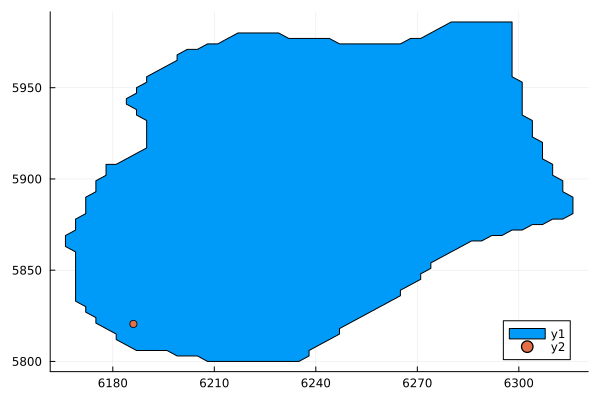

In [91]:
# Scratchpad
# Test if point is in Polygon

idx = 7069

s = inpoly2(Array(centers), Matrix(polygons[idx]))

f = findfirst(s[:, 1])
print(f)
poly = polygons[idx]
p = centers[f,:]
print(p)
plt = plot(Shape(poly[:, 1], poly[:, 2]))
scatter!([p[1]], [p[2]])
plt